[[ 2.40654457e-01 -8.16905509e-01 -2.27987613e-01 ... -2.26066424e-02
   6.66668612e-03 -1.72162411e-03]
 [-5.38049883e-01  2.17176135e-01 -4.23587646e-02 ...  1.12459316e-02
   1.58386480e-02  7.54081969e-03]
 [ 6.47606150e-01 -2.51307160e-01  3.27652833e-01 ... -7.39278092e-04
  -5.39553056e-03 -4.21414343e-04]
 ...
 [-8.10538383e-01  5.97263971e-02  4.11736240e-02 ... -2.39746907e-03
   3.29725183e-03 -1.90630389e-02]
 [-8.55484379e-01  3.19138269e-02  8.30744668e-02 ...  5.93227925e-03
   8.37770108e-03 -3.58160687e-02]
 [-8.46316485e-01 -2.69433269e-02  4.06478693e-02 ...  3.07093057e-02
   6.75200214e-03  3.00820548e-03]]

Explained Variance Ratio:
[0.34496569 0.11025746 0.07727034 0.06707354 0.05417079 0.04969769
 0.04882845 0.04260827 0.0349698  0.03003342 0.0239916  0.02254229
 0.01987187 0.01636997 0.01269894 0.01153111 0.00815922 0.00680902
 0.00540099 0.00450912 0.0036668  0.00244337 0.00151526 0.00061498]
Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of 

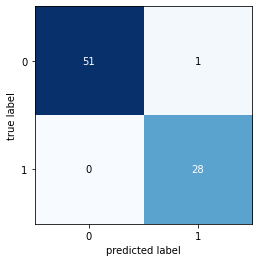

Path to model.pkl file: C:\Users\rsvr1\model.pkl


In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import warnings
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
warnings.filterwarnings("ignore")
#importing dataset
df=pd.read_csv("kidney_disease_dataset.csv")
df.drop('id', axis = 1, inplace = True)
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})
# checking for null values

df.isna().sum().sort_values(ascending = False)
from sklearn.impute import KNNImputer
def impute_null(col):
    impute = KNNImputer(n_neighbors=3)
    col_data = df[col].values.reshape(-1, 1)
    df[col] = impute.fit_transform(col_data)
for col in num_cols:
    impute_null(col)
#mode imputation for categorical features
def impute_mode(col):
    imputer = SimpleImputer(strategy='most_frequent')
    col_data = df[col].values.reshape(-1, 1)
    df[col] = imputer.fit_transform(col_data)
for col in cat_cols:
    impute_mode(col)
#encoding independent variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
#dividing into independent and dependent variables
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(X)
new_features = scaler.transform(X)
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(new_features)
# Explained variance ratio
print(X_pca)
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
# Plotting explained variance ratio
'''plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()'''
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#extra tree
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=67)
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, etc.predict(X_test)))
plt.show()
pickle.dump(etc,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
import os

# Get the absolute path of the current directory
current_dir = os.path.abspath(os.path.dirname("C:/Users/rsvr1/mini project"))

# Construct the path to the model.pkl file
model_path = os.path.join(current_dir, 'model.pkl')

print("Path to model.pkl file:", model_path)
